<a href="https://colab.research.google.com/github/mat-roa/Fase_01-Pos_Tech_FIAP/blob/main/TechChallengeFase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

#Importando e formatando os dados

In [ ]:
dados1 = pd.read_excel("/content/drive/MyDrive/FIAP/ExpVinho.xlsx",index_col='Pais', thousands='.')
dados1

,Id,2007-quan,2007-valor,2008-quan,2008-valor,2009-quan,2009-valor,2010-quan,2010-valor,2011-quan,...,2019-quan,2019-valor,2020-quan,2020-valor,2021-quan,2021-valor,2022-quan,2022-valor,total-quan,total-valor
Pais,,,,,,,,,,,,,,,,,,,,,
Afeganistão,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,11,46,0,0,11,46
Africa do Sul,2,0,0,0,0,0,0,0,0,0,...,26,95,4,21,0,0,0,0,30,116
Alemanha,3,119512,238052,265742,429970,225086,393482,27715,138666,36070,...,3660,25467,6261,32605,2698,6741,7630,45367,1028563,2784446
Angola,4,25931,49753,25721,71083,54786,84235,33557,189891,13889,...,345,1065,0,0,0,0,4068,4761,194799,625942
Antígua e Barbuda,5,0,0,0,0,0,0,0,0,0,...,219,1549,624,1864,805,2268,419,1866,2104,7738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguai,115,0,0,0,0,0,0,914,2929,1238,...,6180,18497,0,0,136774,149842,637117,997367,792595,1219878
Vanuatu,116,0,0,0,0,0,0,0,0,0,...,0,0,18,31,0,0,0,0,18,31
Venezuela,117,20700,27370,0,0,0,0,0,0,0,...,0,0,4086,9808,26415,35944,23220,32351,76215,116198


In [ ]:
# Selecionar apenas as colunas que contêm "-quan" e "-valor" no nome
colunas_quant = [coluna for coluna in dados1.columns if '-quan' in coluna]
colunas_valor = [coluna for coluna in dados1.columns if '-valor' in coluna]

# Criar um novo DataFrame apenas com as colunas selecionadas
dados_quant = dados1[colunas_quant]
dados_valor = dados1[colunas_valor]

#Selecionar colunas com 'total
total_quant = [coluna for coluna in dados_quant if 'total' in coluna]
total_valor = [coluna for coluna in dados_valor if 'total' in coluna]

#Criar DF apenas com as colunas pais e total
dados_quant_total = dados_quant[total_quant]
dados_valor_total = dados_valor[total_valor]

#Ordenando os DF com os totais
dados_valor_total_ordenados = dados_valor_total.sort_values(by='total-valor', ascending=False)
dados_quant_total_ordenados = dados_quant_total.sort_values(by='total-quan', ascending=False)

dados_valor_total_ordenados.drop('Total', inplace=True, axis=0)
dados_quant_total_ordenados.drop('Total', inplace=True, axis=0)

dados_quant_total_ordenados = dados_quant_total_ordenados / 1000000
dados_valor_total_ordenados = dados_valor_total_ordenados / 1000000


In [ ]:
# Apagando as colunas total dos dataframes que possuem as informações separadas por mes
dados_quant.drop('total-quan', inplace=True, axis=1)
dados_valor.drop('total-valor', inplace=True, axis=1)

<ipython-input-11-571525bc7a11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_quant.drop('total-quan', inplace=True, axis=1)
<ipython-input-11-571525bc7a11>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_valor.drop('total-valor', inplace=True, axis=1)


In [ ]:
#Transpor as matrizes para conseguir plotar as informações & removendo letras dos index
dados_quant_plotaveis = dados_quant.T
dados_quant_plotaveis.index = dados_quant_plotaveis.index.str.replace('\D', '', regex=True)

dados_valor_plotaveis = dados_valor.T
dados_valor_plotaveis.index = dados_valor_plotaveis.index.str.replace('\D', '', regex=True)

dados_quant_plotaveis = dados_quant_plotaveis / 1000000
dados_valor_plotaveis = dados_valor_plotaveis / 1000000

#Graficos

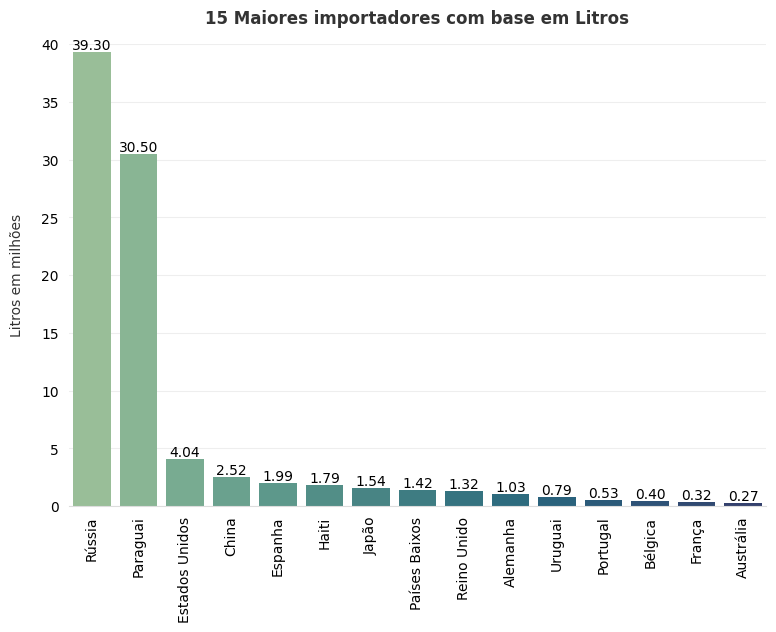

In [ ]:
#Grafico dos 15 maiores compradores com base em litros - PRONTO
plt.figure(figsize=(9,6))
sns.set_palette(sns.color_palette("crest",15))
ax = sns.barplot(data=dados_quant_total_ordenados,x=dados_quant_total_ordenados.head(15).index,y=dados_quant_total_ordenados['total-quan'].head(15))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

#Formatando os eixos e adicionando grid horizontal
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.set_ylim(0,40)

#formatando labels e titulo
plt.xticks(rotation=90)
plt.ylabel('Litros em milhões', labelpad=12.5, color='#333333')
plt.xlabel(xlabel=None)
plt.title("15 Maiores importadores com base em Litros", pad=15, color='#333333', weight='bold')

plt.show()

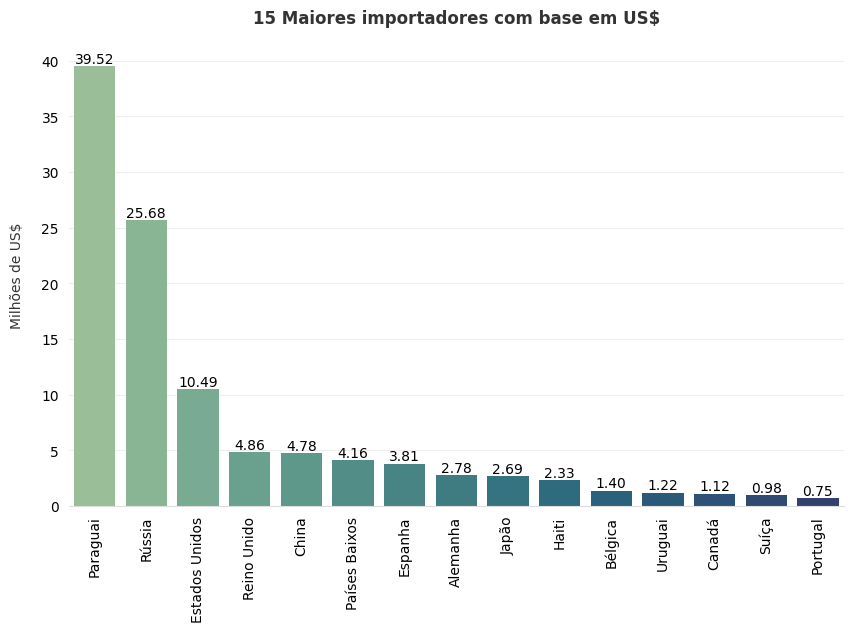

In [ ]:
#Grafico dos 15 maiores compradores com base em US$ - PRONTO
plt.figure(figsize=(10,6))
sns.set_palette(sns.color_palette("crest",15))
ax = sns.barplot(data=dados_valor_total_ordenados,x=dados_valor_total_ordenados.head(15).index,y=dados_valor_total_ordenados['total-valor'].head(15))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

#Formatando os eixos e adicionando grid horizontal
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')

#formatando labels e titulo
plt.xticks(rotation=90)
plt.ylabel('Milhões de US$', labelpad=12.5, color='#333333')
plt.xlabel(xlabel=None)
plt.title("15 Maiores importadores com base em US$", pad=15, color='#333333', weight='bold')

plt.show()

In [ ]:
#Renda de vinho/Quantidade de litros exportado para o mundo em 15 anos
plt.figure(figsize=(9,6))
ax = sns.lineplot(data=dados_valor_plotaveis, x=dados_valor_plotaveis.index, y='Total', label='Valor em US$', color='#74a37f')
ax = sns.scatterplot(data=dados_valor_plotaveis, x=dados_valor_plotaveis.index, y='Total', color='#74a37f')
ax = sns.lineplot(data=dados_quant_plotaveis, x=dados_quant_plotaveis.index, y='Total', label='Litros', color='#16537E')
ax = sns.scatterplot(data=dados_quant_plotaveis, x=dados_quant_plotaveis.index, y='Total',  color='#16537E')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

#Formatando os eixos e adicionando grid horizontal
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#c6c6c6')
ax.spines['bottom'].set_color('#c6c6c6')
ax.tick_params(bottom=False, left=False)
ax.yaxis.grid(True, color='#f1f1f1')
ax.set_axisbelow(True)
ax.yaxis.set_major_locator(ticker.IndexLocator(base=3, offset=0))

#formatando labels e titulo
plt.xticks(rotation=45)
plt.title("Numeros da exportação de vinho para o mundo entre 2007-2022", pad=15, color='#333333', weight='bold')
plt.xlabel(xlabel=None)
plt.ylabel('Quantidade em milhões', labelpad=12.5, color='#333333')
plt.legend()

plt.show()

In [ ]:
#lineplot para mostrar gradativamente os numeros de exportação para o paraguai
plt.figure(figsize=(9,6))
ax = sns.lineplot(data=dados_valor_plotaveis, x=dados_valor_plotaveis.index, y='Paraguai', label='Valor em US$', color='#74a37f')
ax = sns.scatterplot(data=dados_valor_plotaveis, x=dados_valor_plotaveis.index, y='Paraguai', color='#74a37f')
ax = sns.lineplot(data=dados_quant_plotaveis, x=dados_quant_plotaveis.index, y='Paraguai', label='Litros', color='#16537E')
ax = sns.scatterplot(data=dados_quant_plotaveis, x=dados_quant_plotaveis.index, y='Paraguai', color='#16537E')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

#Formatando os eixos e adicionando grid horizontal
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#c6c6c6')
ax.spines['bottom'].set_color('#c6c6c6')
ax.tick_params(bottom=False, left=False)
ax.yaxis.grid(True, color='#f1f1f1')
ax.set_axisbelow(True)

#formatando labels e titulo
plt.xticks(rotation=45)
plt.title("Números da exportação para o Paraguai", pad=15, color='#333333', weight='bold')
plt.xlabel(xlabel=None)
plt.ylabel('Quantidade em milhões', labelpad=12.5, color='#333333')
plt.legend()

plt.show()

In [ ]:
#lineplot para mostrar gradativamente os numeros de exportação para o rússia
plt.figure(figsize=(9,6))
ax = sns.lineplot(data=dados_valor_plotaveis, x=dados_valor_plotaveis.index, y='Rússia', label='Valor em US$', color='#74a37f')
ax = sns.scatterplot(data=dados_valor_plotaveis, x=dados_valor_plotaveis.index, y='Rússia', color='#74a37f')
ax = sns.lineplot(data=dados_quant_plotaveis, x=dados_quant_plotaveis.index, y='Rússia', label='Litros', color='#16537E')
ax = sns.scatterplot(data=dados_quant_plotaveis, x=dados_quant_plotaveis.index, y='Rússia', color='#16537E')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

#Formatando os eixos e adicionando grid horizontal
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#c6c6c6')
ax.spines['bottom'].set_color('#c6c6c6')
ax.tick_params(bottom=False, left=False)
ax.yaxis.grid(True, color='#f1f1f1')
ax.set_axisbelow(True)

ax.yaxis.set_major_locator(ticker.IndexLocator(base=3, offset=0))
ax.yaxis.set_minor_locator(ticker.IndexLocator(base=3, offset=0))

#formatando labels e titulo
plt.xticks(rotation=45)
plt.title("Números da exportação para o Rússia", pad=15, color='#333333', weight='bold')
plt.xlabel(xlabel=None)
plt.ylabel('Quantidade em milhões', labelpad=12.5, color='#333333')
plt.legend()
ax.set_ylim(-1,23)

plt.show()

In [ ]:
dados_valor_plotaveis

#Graficos 2

In [ ]:
#Renda de vinho/Quantidade de litros exportado para 3 paises em 15 anos
plt.figure(figsize=(9,6))
ax = sns.lineplot(data=dados_valor_plotaveis, x=dados_valor_plotaveis.index, y='Estados Unidos', label='EUA', color='#74a37f')
ax = sns.scatterplot(data=dados_valor_plotaveis, x=dados_valor_plotaveis.index, y='Estados Unidos', color='#74a37f')
ax = sns.lineplot(data=dados_valor_plotaveis, x=dados_valor_plotaveis.index, y='China', label='China', color='#16537E')
ax = sns.scatterplot(data=dados_valor_plotaveis, x=dados_valor_plotaveis.index, y='China', color='#16537E')
ax = sns.lineplot(data=dados_valor_plotaveis, x=dados_valor_plotaveis.index, y='Reino Unido', label='Reino Unido', color='#702963')
ax = sns.scatterplot(data=dados_valor_plotaveis, x=dados_valor_plotaveis.index, y='Reino Unido', color='#702963')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

#Formatando os eixos e adicionando grid horizontal
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#c6c6c6')
ax.spines['bottom'].set_color('#c6c6c6')
ax.tick_params(bottom=False, left=False)
ax.yaxis.grid(True, color='#f1f1f1')
ax.set_axisbelow(True)
ax.set_ylim(0,1.6)

#formatando labels e titulo
plt.xticks(rotation=45)
plt.title("EUA, China e Reino Unido em US$ entre 2007-2022", pad=15, color='#333333', weight='bold')
plt.xlabel(xlabel=None)
plt.ylabel('Milhões de US$', labelpad=12.5, color='#333333')
plt.legend()

plt.show()

In [ ]:
plt.figure(figsize=(9, 6))

x = range(len(dados_valor_plotaveis))
width = 0.25

plt.bar([i - width for i in x], dados_valor_plotaveis['Estados Unidos'], width=width, label='EUA', color='#74a37f')
plt.bar(x, dados_valor_plotaveis['China'], width=width, label='China', color='#16537E')
plt.bar([i + width for i in x], dados_valor_plotaveis['Reino Unido'], width=width, label='Reino Unido', color='#702963')

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#c6c6c6')
plt.gca().spines['bottom'].set_color('#c6c6c6')
plt.gca().tick_params(bottom=False, left=False)
plt.gca().yaxis.grid(True, color='#f1f1f1')
plt.gca().set_axisbelow(True)
plt.gca().set_ylim(0,1.6)

#formatando labels e titulo
plt.xticks(x, dados_valor_plotaveis.index, rotation=45)
plt.title("EUA, China e Reino Unido em US$ entre 2007-2022", pad=15, color='#333333', weight='bold')
plt.xlabel(xlabel=None)
plt.ylabel('Milhões de US$', labelpad=12.5, color='#333333')
plt.legend()

plt.show()

In [ ]:
dados_quant_total_ordenados.head(15)

In [ ]:
dados_valor_total_ordenados.head(15)

,total-valor
Pais,
Paraguai,39.520550
Rússia,25.677644
Estados Unidos,10.494605
Reino Unido,4.855708
China,4.776915
Países Baixos,4.156362
Espanha,3.808552
Alemanha,2.784446
Japão,2.694583
